## Create charts analyzing salaries for the bonus challenge
#### First read in tables from postgresql database

In [1]:
%matplotlib notebook

In [2]:
# Setup dependencies for charting and SQLAlchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# add a config file to the .gitignore to import username and password needed for the engine
from config import username_password

In [3]:
# Create an engine that can talk to the database
engine = create_engine(f'postgresql://{username_password}@localhost:5432/employees_db_sql_challenge')

connection = engine.connect()

In [4]:
# Set how floats should display for the charts
pd.options.display.float_format = "{:.2f}".format

In [5]:
# Examine the salary table
data_salaries = pd.read_sql('SELECT * FROM salaries', connection)
# Preview the data
data_salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
# Look at statistics for the salaries
data_salaries.describe()

,emp_no,salary
count,300024.00,300024.00
mean,253321.76,52970.73
std,161828.24,14301.48
min,10001.00,40000.00
25%,85006.75,40000.00
50%,249987.50,48681.00
75%,424993.25,61758.00
max,499999.00,129492.00


#### Create a histogram of salaries

<IPython.core.display.Javascript object>


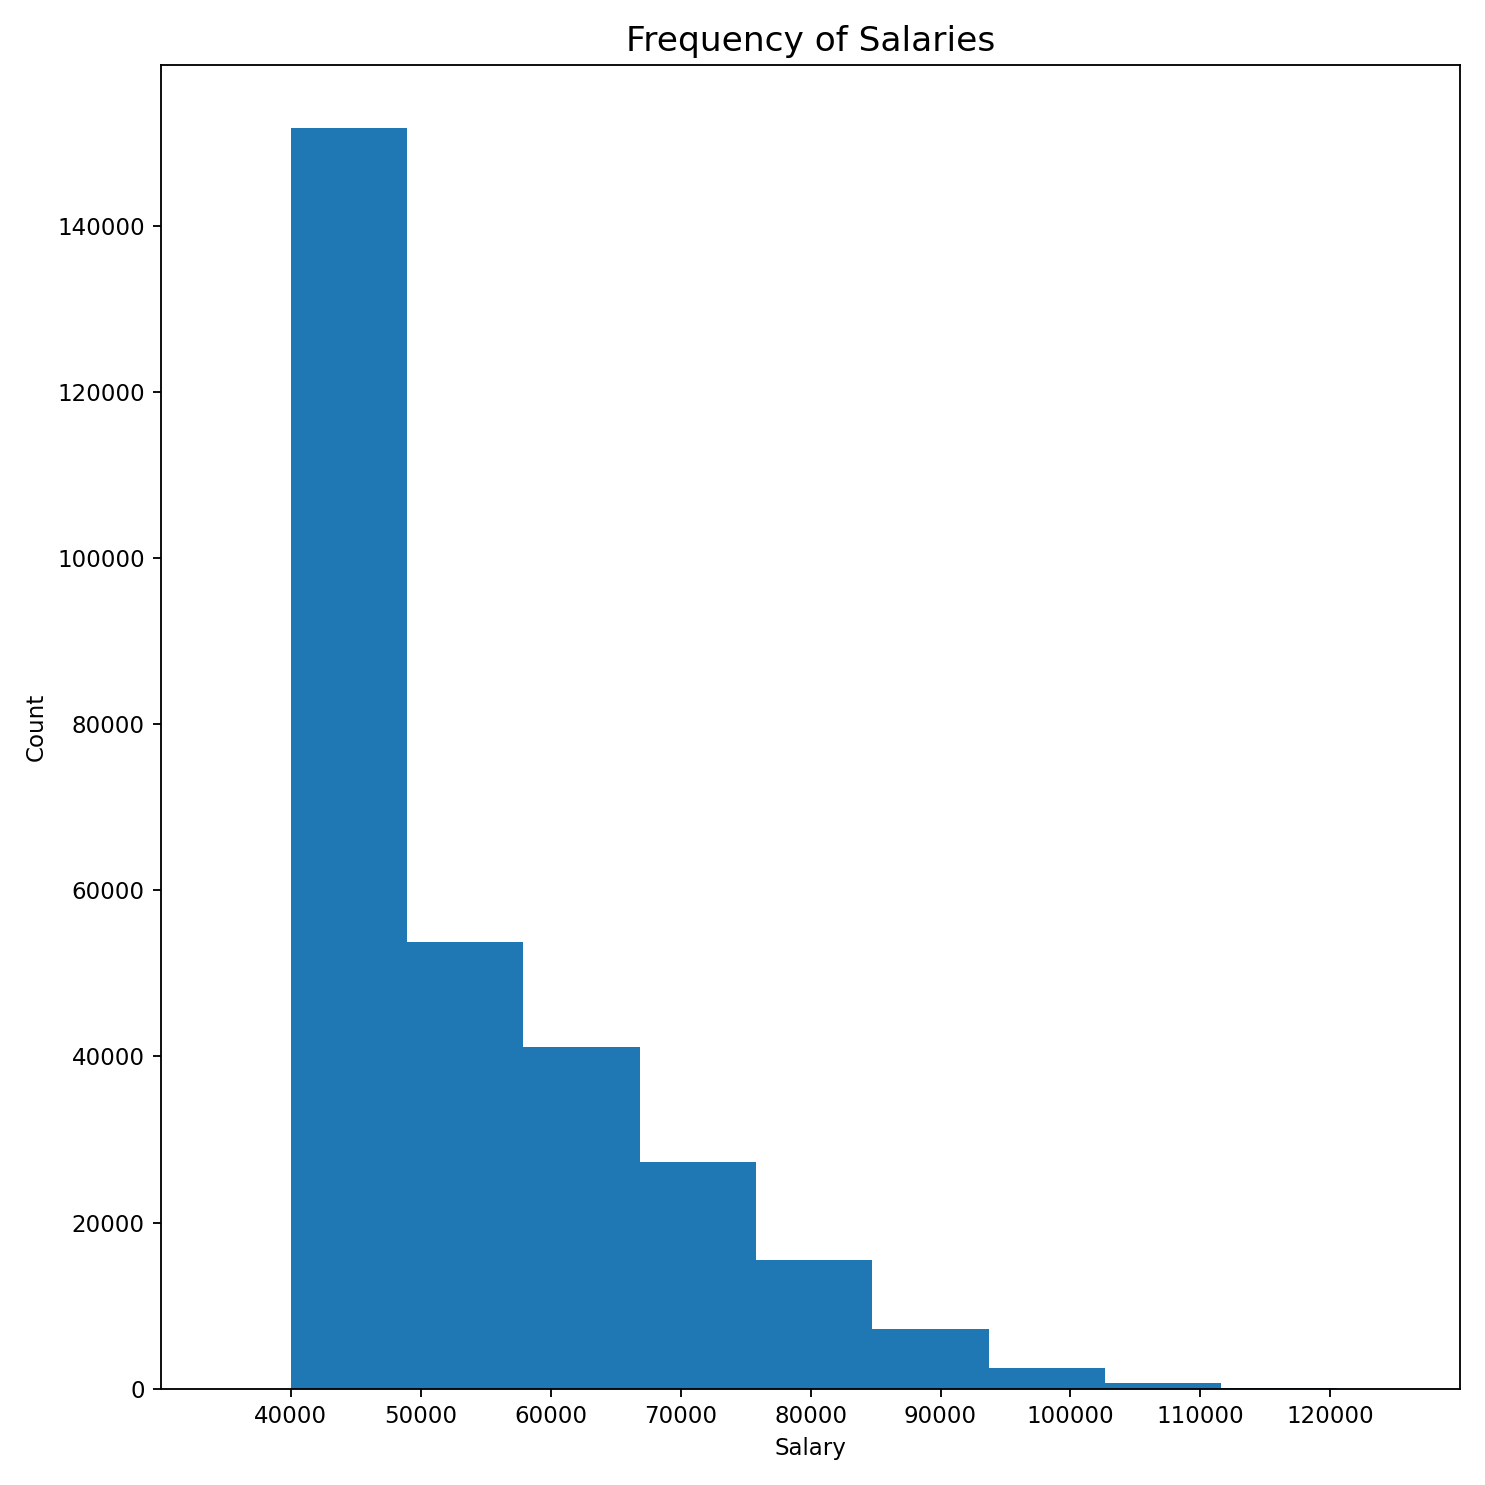

In [7]:
# Plot a histogram of the frequency of salary ranges
emp_salaries = data_salaries['salary']

# Consider tick marks needed across x-axis
x_axis = np.arange(40000, 130000, 10000)
tick_locations = [value for value in x_axis]

# Plot the figure and set the xlim
hist_fig = plt.figure(figsize=(9, 9))
hist_fig = plt.xlim([30000, 130000])
hist_fig = plt.hist(emp_salaries)

# Add title and labels and show the histogram
plt.title("Frequency of Salaries", size=15)
plt.xlabel("Salary")
plt.ylabel('Count')
plt.xticks(tick_locations, x_axis)
plt.show()
plt.tight_layout()

#### Observation:
* The histogram for salaries shows salaries are commonly below \\$50,000 for these employees, and that the minimum salary is $40,000.

#### Read in the additional tables needed to group salaries by title and merge the data from these tables

In [8]:
# To also look at salaries by title, read in the employees and titles tables 
data_employees = pd.read_sql('SELECT * FROM employees', connection)
data_employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [9]:
data_titles = pd.read_sql('SELECT * FROM titles', connection)
data_titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [10]:
# Merge the three tables, starting with employees and salaries
merge1_df = pd.merge(data_employees, data_salaries, on='emp_no')
merge1_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [11]:
# Rename title_id in data_titles to match merge1_df before final merge
data_titles = data_titles.rename(columns={"title_id" : "emp_title_id"})
data_titles

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [12]:
merge_final_df = pd.merge(merge1_df, data_titles, on='emp_title_id')
merge_final_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


#### Create a bar chart of average salary by title

In [13]:
# Group by title to analyze salaries
title_groupby = merge_final_df.groupby(['title']).salary
title_groupby.mean()

title
Assistant Engineer   48564.43
Engineer             48535.34
Manager              51531.04
Senior Engineer      48506.80
Senior Staff         58550.17
Staff                58465.38
Technique Leader     48582.90
Name: salary, dtype: float64

In [14]:
# Create a dataframe for the mean salaries by title
title_groupby_df = pd.DataFrame(title_groupby.mean())
title_groupby_df

,salary
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


<IPython.core.display.Javascript object>


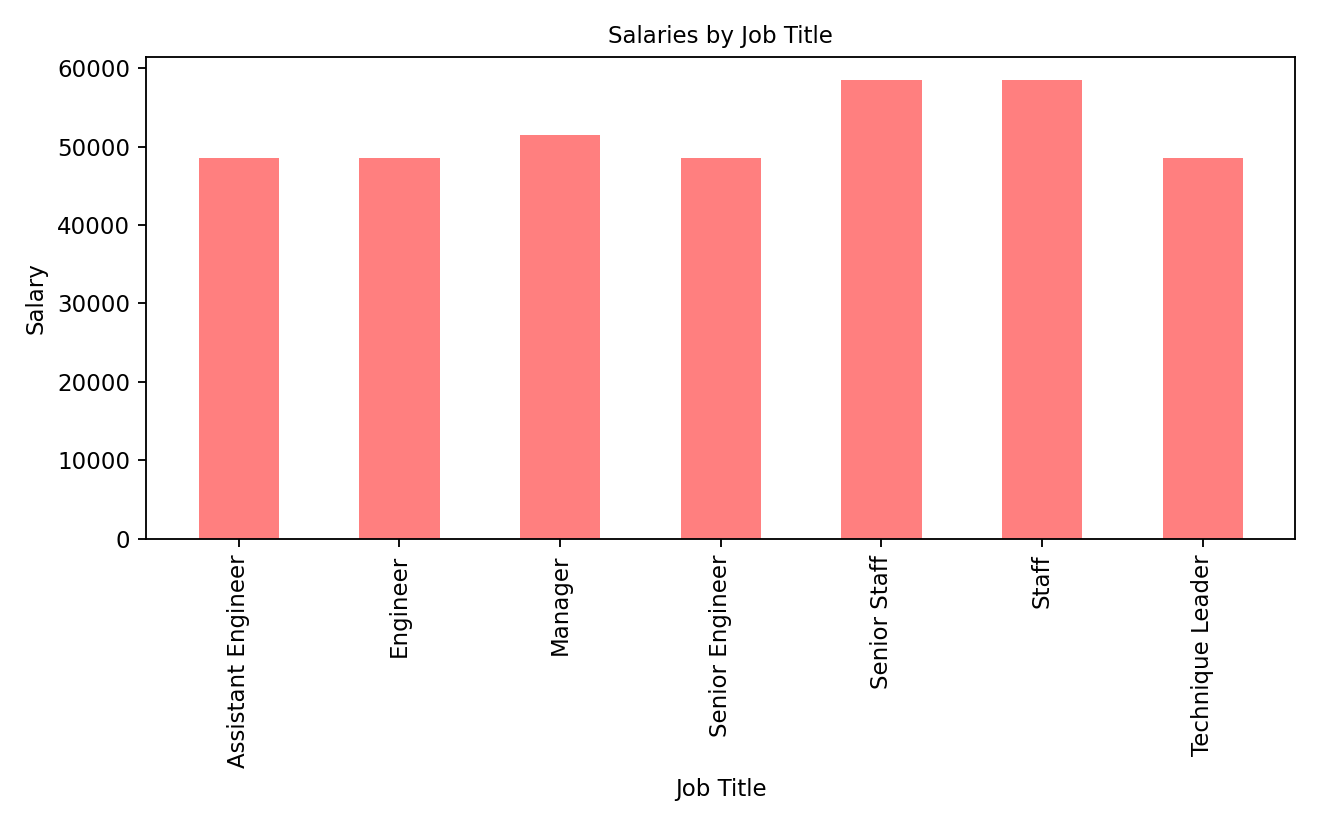

In [15]:
# Set x axis and tick locations
x_axis = np.arange(len(title_groupby_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8, 5))
plt.bar(x_axis, title_groupby_df['salary'], color='r', alpha=0.5, width=0.5, align="center")
plt.xticks(tick_locations, ['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer',\
                            'Senior Staff', 'Staff', 'Technique Leader'], rotation='vertical')

plt.title("Salaries by Job Title", size=10)
plt.xlabel("Job Title")
plt.ylabel('Salary')
plt.show()
plt.tight_layout()
#plt.xticks(tick_locations, title_groupby_df['title'], rotation="vertical")

In [24]:
merge_final_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


In [33]:
# emp_no == '499942'

filtered_merge_final_df = merge_final_df.loc[merge_final_df['emp_no'] == 499942]
filtered_merge_final_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader
